In [1]:
# Reiniciar el kernel y establecer la variable antes de cualquier importación
# En la primera celda, antes de cualquier otra, coloca:
#
# import os
# os.environ["OMP_NUM_THREADS"] = "2"
# 
# ➡️ Luego reinicia el kernel (Kernel > Restart Kernel) y ejecuta las celdas desde el principio.
# 
#    ⚠️ Asegúrate de que ninguna celda con import numpy, sklearn, etc. haya sido ejecutada antes de esta.

import os
os.environ["OMP_NUM_THREADS"] = "2"

# Tipos de Aprendizaje en Machine Learning: 
Este tutorial muestra los tres tipos principales de aprendizaje en Machine Learning: **supervisado**, **no supervisado**, y **por refuerzo**. Cada sección incluye un ejemplo visual y comentado.


## 1. Aprendizaje Supervisado

### Problema: Ajustar una función simple (seno) usando un perceptrón

**Objetivo:** Aproximar la función `f(x) = sin(x)` utilizando una red neuronal tipo perceptrón multicapa (MLP).

**Descripción:**
- Se generan datos de entrada `x` uniformemente espaciados en el intervalo `[0, 2π]`.
- La salida correspondiente es `y = sin(x)`, lo que forma un conjunto de datos continuo.
- Se divide el conjunto de datos en entrenamiento y prueba (80/20).
- Se entrena un MLP con una sola capa oculta de 5 neuronas y función de activación `tanh`.
- La salida usa una activación lineal (`MLPRegressor` la aplica por defecto).
- Se entrena el modelo por 1200 épocas, visualizando el progreso cada 300.

**Puntos Clave:**
- Se trata de un problema clásico de regresión.
- La función `tanh` permite una activación no lineal útil para capturar la curva sinusoidal.
- `warm_start=True` permite continuar entrenando el mismo modelo durante varias épocas.


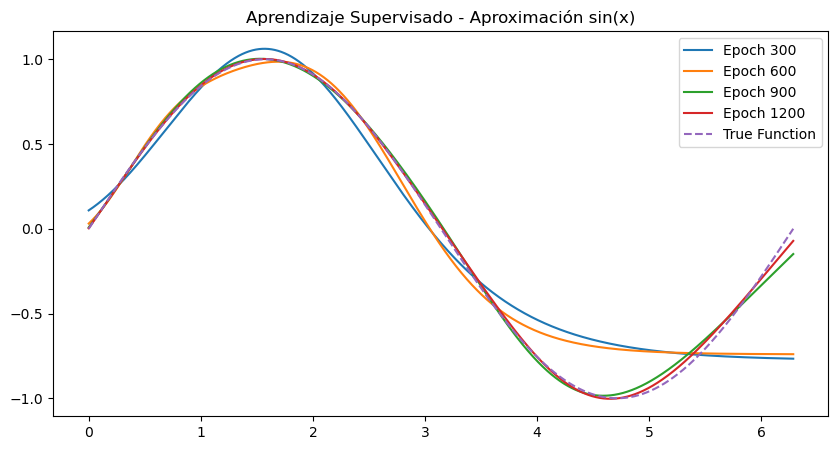

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.exceptions import ConvergenceWarning



warnings.filterwarnings("ignore", category=ConvergenceWarning)

X = np.linspace(0, 2 * np.pi, 2000).reshape(-1, 1)
y = np.sin(X).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(7,), activation='tanh', solver='adam', max_iter=1, warm_start=True)

plt.figure(figsize=(10, 5))
for epoch in range(1, 1201):
    mlp.fit(X_train, y_train)
    if epoch % 300 == 0:
        y_pred = mlp.predict(X)
        plt.plot(X, y_pred, label=f'Epoch {epoch}')


plt.plot(X, y, label='True Function', linestyle='--')
plt.legend()
plt.title('Aprendizaje Supervisado - Aproximación sin(x)')
plt.show()

---

## 2. Aprendizaje No Supervisado

### Problema: Agrupar datos en clústers  usando KMeans

**Objetivo:** Agrupar puntos en un número de clasters definido por  mediante el algoritmo `KMeans`.

**Descripción:**
- Se generan 400 puntos en 2D agrupados en torno a 4 centros predefinidos.
- Se ejecuta el algoritmo `KMeans` para agrupar los datos la cantidad de clústers definidos por la variable NumberOfClusters.
- La visualización se actualiza durante.

**Puntos Clave:**
- El aprendizaje no supervisado no usa etiquetas; el modelo descubre patrones en los datos.
- `KMeans` reubica los centroides para minimizar la distancia cuadrática total dentro de cada clúster.
- La visualización muestra cómo se ajustan progresivamente los clústers.


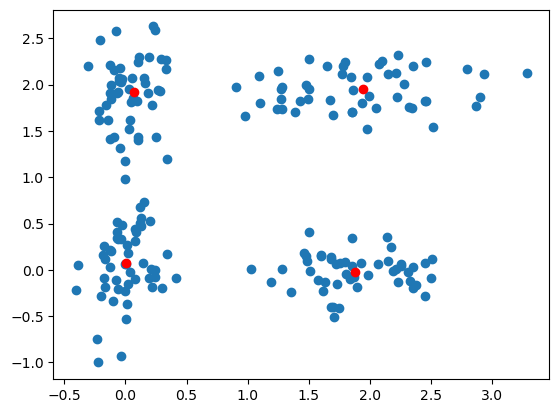

In [6]:
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
features  = np.array([[ 1.9,2.3],
                      [ 1.5,2.5],
                      [ 0.8,0.6],
                      [ 0.4,1.8],
                      [ 0.1,0.1],
                      [ 0.2,1.8],
                      [ 2.0,0.5],
                      [ 0.3,1.5],
                      [ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)
codes = 3
kmeans(whitened,codes)

#Número de Clústers
NumberOfClusters = 4

# Crea cuatro clústers a, b c y d
pts = 50
rng = np.random.default_rng()
a = rng.multivariate_normal([0,  0], [[4, 1], [1, 20]], size=pts)
b = rng.multivariate_normal([20, 0], [[20, 1], [1, 4]], size=pts)
c = rng.multivariate_normal([0, 20], [[4, 1], [1, 20]], size=pts)
d = rng.multivariate_normal([20,20], [[20, 1], [1, 4]], size=pts)

features = np.concatenate((a, b, c, d))
# Gráfico de los datos
# plt.scatter(features[:, 0], features[:, 1])

# Filtra los datos para hacerlos "blancos"
whitened = whiten(features)

# Halla la cantidad de NumberOfClusters en los datos
codebook, distortion = kmeans(whitened, NumberOfClusters)

# Grafica los datos blanqueados con los centroides en rojo
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')

plt.show()

---

## 3. Aprendizaje por Refuerzo

### Problema: Un agente aprende a alcanzar una meta en un grid simple


**Objetivo:** Enseñar a un agente a llegar desde la posición (0, 0) hasta la meta (4, 4) en una grilla 5x5 mediante aprendizaje Q-learning.

**Descripción:**
- El espacio es un entorno discreto de 5x5 celdas. El agente puede moverse en 4 direcciones.
- El agente recibe una pequeña penalización (-0.01) por cada paso, y una recompensa de 1 al llegar a la meta.
- Se utiliza la técnica de Q-learning para actualizar una tabla Q que representa el valor de cada acción en cada estado.
- El agente elige acciones según una política ε-greedy (exploración aleatoria y explotación de lo aprendido).
- Cada 20 episodios se visualiza la política aprendida mediante flechas.
- Finalmente, se muestra el camino aprendido por el agente desde el origen a la meta.

**Puntos Clave:**
- Q-learning es un algoritmo off-policy: aprende la política óptima independientemente de las acciones exploradas.
- La tabla Q se actualiza usando la ecuación de Bellman.
- La visualización permite entender cómo evoluciona la política del agente y el camino que sigue al final.

In [ ]:
grid_size = 5
Q = np.zeros((grid_size, grid_size, 4))
alpha = 0.1
gamma = 0.9
epsilon = 0.1

def step(state, action):
    x, y = state
    if action == 0:
        x = max(0, x - 1)
    elif action == 1:
        x = min(grid_size - 1, x + 1)
    elif action == 2:
        y = max(0, y - 1)
    elif action == 3:
        y = min(grid_size - 1, y + 1)
    reward = 1 if (x, y) == (4, 4) else -0.01
    return (x, y), reward

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(4)
    return np.argmax(Q[state[0], state[1]])

def update_Q(state, action, reward, next_state):
    predict = Q[state[0], state[1], action]
    target = reward + gamma * np.max(Q[next_state[0], next_state[1]])
    Q[state[0], state[1], action] += alpha * (target - predict)

plt.figure(figsize=(10, 5))
for episode in range(100):
    state = (0, 0)
    while state != (4, 4):
        action = choose_action(state)
        next_state, reward = step(state, action)
        update_Q(state, action, reward, next_state)
        state = next_state

    if episode % 20 == 0:
        policy = np.chararray((grid_size, grid_size), unicode=True)
        for i in range(grid_size):
            for j in range(grid_size):
                best = np.argmax(Q[i, j])
                policy[i, j] = ['↑', '↓', '←', '→'][best]
        plt.clf()
        plt.imshow(np.ones((grid_size, grid_size)), cmap='gray', vmin=0, vmax=1)
        for i in range(grid_size):
            for j in range(grid_size):
                plt.text(j, i, policy[i, j], ha='center', va='center', fontsize=16)
        plt.title(f'Política aprendida - Episodio {episode}')
        plt.pause(0.5)

state = (0, 0)
path = [state]
while state != (4, 4):
    action = np.argmax(Q[state[0], state[1]])
    state, _ = step(state, action)
    path.append(state)

path = np.array(path)
plt.figure(figsize=(6, 6))
plt.imshow(np.ones((grid_size, grid_size)), cmap='gray', vmin=0, vmax=1)
plt.plot(path[:, 1], path[:, 0], marker='o', color='blue')
plt.scatter(4, 4, color='red', s=100, label='Meta')
plt.title('Camino aprendido por el agente')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

## Conclusión

Estos tres ejemplos demuestran los principales paradigmas del aprendizaje automático:

- El **aprendizaje supervisado** busca modelar relaciones input-output usando datos etiquetados.
- El **aprendizaje no supervisado** revela estructuras ocultas sin necesidad de etiquetas.
- El **aprendizaje por refuerzo** enseña a un agente a actuar mediante recompensas en un entorno dinámico.

Todos los ejemplos son visuales, simples y efectivos para comprender la mecánica de cada técnica.